<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_025_PolynomialLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [12]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ushape.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "hafeezabro/ushape",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
  pandas_kwargs={'header': None}
)

print("First 5 records:", df.head())

/tmp/ipython-input-2985132476.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'ushape' dataset.
First 5 records:           0         1    2
0  0.031595  0.986988  0.0
1  2.115098 -0.046244  1.0
2  0.882490 -0.075756  0.0
3 -0.055144 -0.037332  1.0
4  0.829545 -0.539321  1.0


In [21]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [13]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [9]:
import matplotlib.pyplot as plt

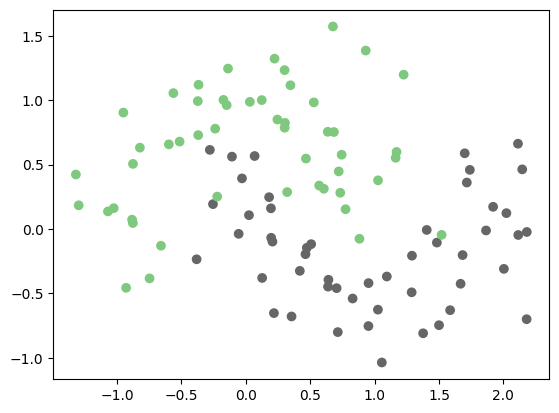

In [17]:
plt.scatter(df[0],df[1],c=df[2],cmap='Accent')

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2)

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_transformed_train = poly.fit(X_train).transform(X_train)
X_transformed_test = poly.transform(X_test)

In [33]:
X_transformed = poly.transform(X)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lor = LogisticRegression()

In [26]:
lor.fit(X_transformed_train,y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [29]:
accuracy_score(y_test,lor.predict(X_transformed_test))

0.9

In [30]:
from mlxtend.plotting import plot_decision_regions

In [47]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[0].min()-1, stop=X[0].max()+1, step=0.01)
    b=np.arange(start=X[1].min()-1, stop=X[1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[0],X[1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

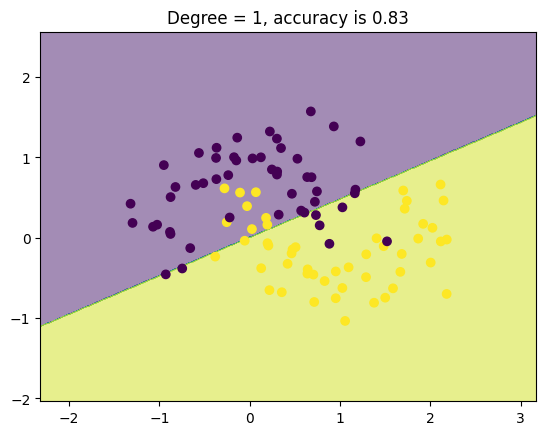

In [48]:
plot_decision_boundary(X,y,1)

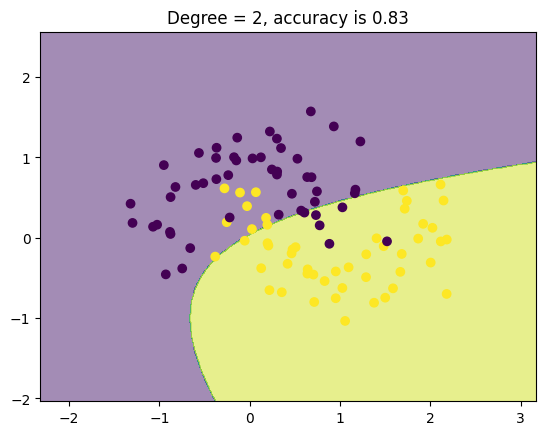

In [53]:
plot_decision_boundary(X,y,2)

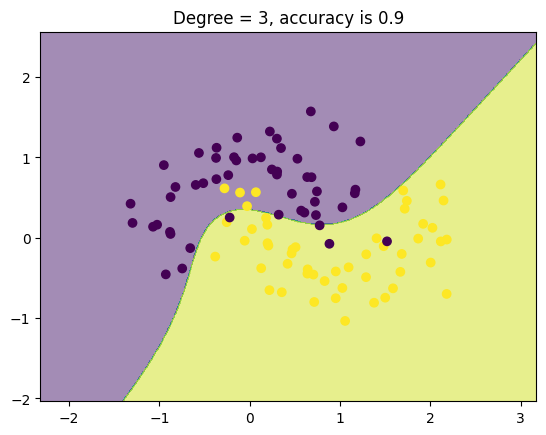

In [52]:
plot_decision_boundary(X,y,3)

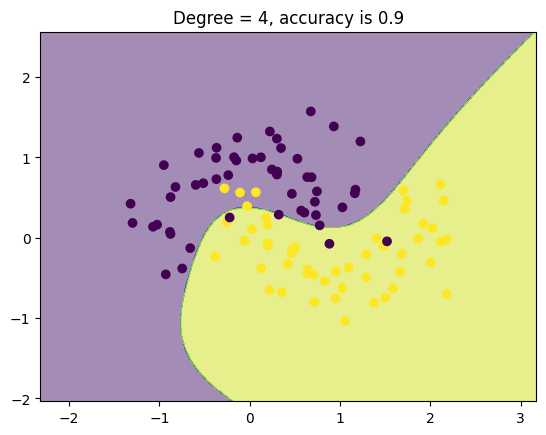

In [51]:
plot_decision_boundary(X,y,4)

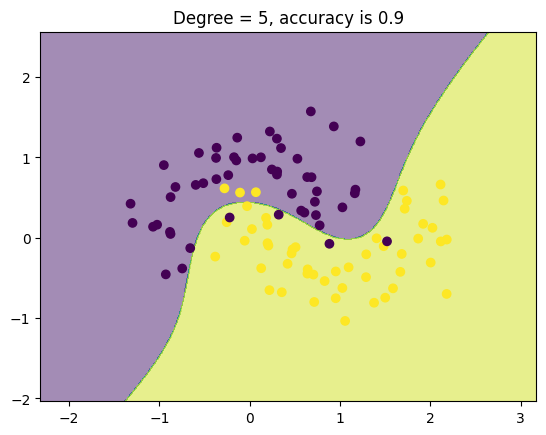

In [50]:
plot_decision_boundary(X,y,5)

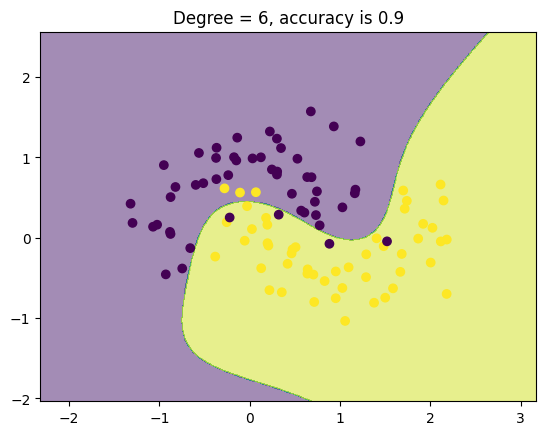

In [49]:
plot_decision_boundary(X,y,6)